In [9]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error


test_df = pd.read_csv('DataSets/testModel.csv')
model = joblib.load('./model/apartment_price_pipeline.pkl')


X_test_final = test_df.drop(columns=['prix'])
y_test_final = test_df['prix']

y_pred_final = model.predict(X_test_final)



In [11]:
mae_final = mean_absolute_error(y_test_final, y_pred_final)
mse_final = mean_squared_error(y_test_final, y_pred_final)
rmse_final = mse_final ** 0.5

print(f"Mean Absolute Error (MAE): {mae_final.round(2)}")
# Définition : La MAE est la moyenne des erreurs absolues entre les valeurs prédites et les valeurs réelles.
#Interprétation : Elle donne une idée de l'erreur moyenne en termes absolus. Plus la MAE est basse, plus les prédictions du modèle sont proches des valeurs réelles.
print(f"Mean Squared Error (MSE): {mse_final.round(2)} ")
# Définition : La MSE est la moyenne des erreurs au carré entre les valeurs prédites et les valeurs réelles. 
#Interprétation : Elle donne une idée de l'erreur moyenne en termes de carrés. Plus la MSE est basse, plus les prédictions du modèle sont proches des valeurs réelles.
# pas pertinent car ici les difference de prix sont tres grande donc la MSE sera tres grande
print(f"Root Mean Squared Error (RMSE): {rmse_final.round(2)}")
# Définition : La RMSE est la racine carrée de la MSE.
#Interprétation : Elle donne une idée de l'erreur moyenne en termes absolus. Plus la RMSE est basse, plus les prédictions du modèle sont proches des valeurs réelles.


Mean Absolute Error (MAE): 94261.3
Mean Squared Error (MSE): 15976519963.93
Root Mean Squared Error (RMSE): 126398.26


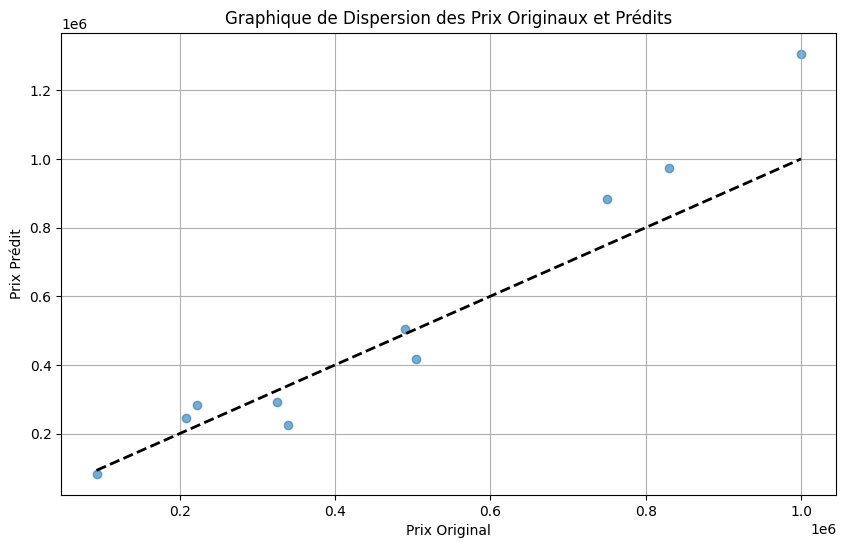

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_final, y_pred_final, alpha=0.6)
plt.plot([y_test_final.min(), y_test_final.max()], [y_test_final.min(), y_test_final.max()], 'k--', lw=2)
plt.xlabel('Prix Original')
plt.ylabel('Prix Prédit')
plt.title('Graphique de Dispersion des Prix Originaux et Prédits')
plt.grid(True)
plt.show()

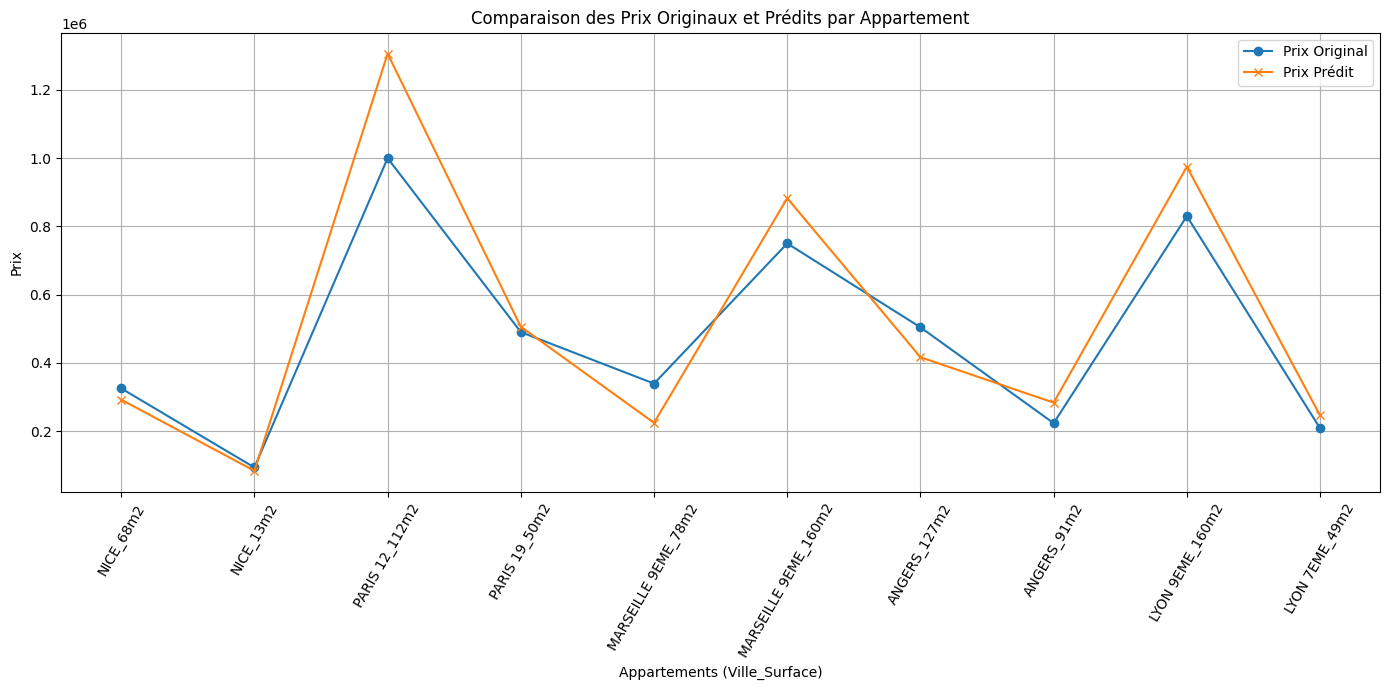

In [6]:

test_df['name'] = test_df.apply(lambda row: f"{row['ville']}_{int(row['surface_habitable'])}m2", axis=1)

plt.figure(figsize=(14, 7))
plt.plot(test_df['name'], y_test_final, label='Prix Original', marker='o')
plt.plot(test_df['name'], y_pred_final, label='Prix Prédit', marker='x')
plt.xlabel('Appartements (Ville_Surface)')
plt.ylabel('Prix')
plt.title('Comparaison des Prix Originaux et Prédits par Appartement')
plt.xticks(rotation=60)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()